In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
import scipy
from fastFM import sgd
from fastFM import als
from fastFM import mcmc
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import time

/Users/adamcoviensky/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Importing Genres

In [2]:
#Matrix with just users, books and genres for ratings
sparse_matrix = scipy.sparse.load_npz('ratings_genres.npz')

In [14]:
#loading in our actual rating values for each row in ratings matrix
y = np.loadtxt('y.csv')

In [15]:
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(sparse_matrix, y, random_state = 42, test_size=0.2)

In [12]:
def calc_RMSE(y_pred, y_test):
    square_error = np.square(y_pred - y_test)
    return np.sqrt(np.sum(square_error)/len(y_pred))

### ALS warmstart

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


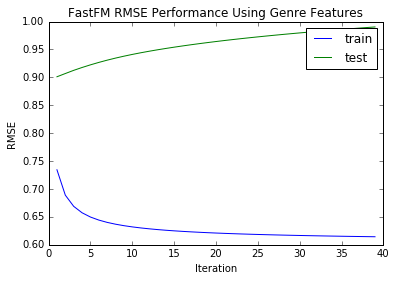

In [16]:
n_iter = 40
rank = 17
seed = 42
step_size = 1
l2_reg_w = 0.1
l2_reg_V = 0.1
std=0.1
l2reg=0.1
fm = als.FMRegression(n_iter=0, l2_reg_w=l2_reg_w,
        l2_reg_V=l2_reg_V, rank=rank, random_state=seed, init_stdev=std, l2_reg=l2reg)
# initalize coefs
fm.fit(X_train_sparse, y_train)

rmse_train = []
rmse_test = []
for i in range(1, n_iter):
    print(i)
    fm.fit(X_train_sparse, y_train, n_more_iter=step_size)
    y_pred = fm.predict(X_test_sparse)
    rmse_train.append(np.sqrt(mean_squared_error(fm.predict(X_train_sparse), y_train)))
    rmse_test.append(np.sqrt(mean_squared_error(fm.predict(X_test_sparse), y_test)))

# print '------- restart ----------'
# values = np.arange(1, n_iter)
# rmse_test_re = []
# rmse_train_re = []
# for i in values:
#     fm = als.FMRegression(n_iter=i, l2_reg_w=l2_reg_w,
#             l2_reg_V=l2_reg_V, rank=rank, random_state=seed, init_stdev=std, l2_reg=l2reg)
#     fm.fit(X_train_sparse, y_train)
#     rmse_test_re.append(np.sqrt(mean_squared_error(fm.predict(X_test_sparse), y_test)))
#     rmse_train_re.append(np.sqrt(mean_squared_error(fm.predict(X_train_sparse), y_train)))

# from matplotlib import pyplot as plt

x = np.arange(1, n_iter) * step_size


plt.plot(x, rmse_train, label='train')
plt.plot(x, rmse_test, label='test')
plt.title('FastFM RMSE Performance Using Genre Features')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
#     plt.plot(values, rmse_train_re, label='train re', linestyle='--')
#     plt.plot(values, rmse_test_re, label='test re', ls='--')
plt.legend()
plt.show()